# Code for Producing Figure 2 

### From the paper:  
**"The Cultural Macroevolution of Arcade Video Games: Innovation, Collaboration, and Collapse"**  

**Authors:**  
Sergi Valverde, Blai Vidiella, Andrej Spiridonov, R. Alexander Bentley  

**Date:** March 14th, 2025  
**Location:** Barcelona  

This notebook generates **Figure 2** with the scatter plots of the log ROM and log CPU speed.


**Data Source**  
- The script loads data from `arcade.csv`, a dataset containing arcade game information.  
- Each row represents an arcade game with attributes such as:  
  - `main_category` (e.g., Shooter, Fighter, Maze)  
  - `sub_category` (e.g., Aerial Combat, Gun-Based)  
  - `log_rom_size` (log-transformed ROM storage size)  
  - `log_clock_speed` (log-transformed CPU clock speed)  
  - `collaboration` (e.g., bootleg vs. collaboration)  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_prod = pd.read_csv('arcade.csv')
print(df_prod.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7822 entries, 0 to 7821
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7822 non-null   int64  
 1   year             7822 non-null   float64
 2   title            7822 non-null   object 
 3   firm             7822 non-null   object 
 4   firm_id          7822 non-null   int64  
 5   log_rom_size     7822 non-null   float64
 6   log_clock_speed  7822 non-null   float64
 7   collaboration    7822 non-null   object 
 8   main_category    7822 non-null   object 
 9   sub_category     7822 non-null   object 
 10  category_id      7822 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 672.3+ KB
None


In [3]:
df_prod[df_prod['title']=="Battle Zone (rev 2)"]


,Unnamed: 0,year,title,firm,firm_id,log_rom_size,log_clock_speed,collaboration,main_category,sub_category,category_id
474,474,1980.0,Battle Zone (rev 2),Atari,4,4.260262,0.179552,single,Shooter,Tank Driving,30


In [4]:
battlezone = df_prod.iloc[474]
battlezone

Unnamed: 0                         474
year                            1980.0
title              Battle Zone (rev 2)
firm                             Atari
firm_id                              4
log_rom_size                  4.260262
log_clock_speed               0.179552
collaboration                   single
main_category                  Shooter
sub_category              Tank Driving
category_id                         30
Name: 474, dtype: object

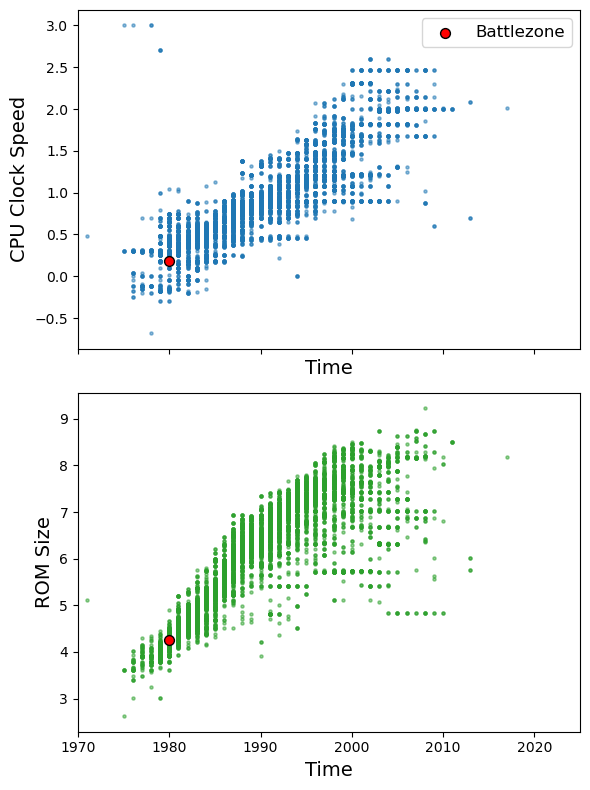

In [5]:
# Create a figure with two panels stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Panel 1: CPU Clock Speed
axes[0].scatter(df_prod['year'], df_prod['log_clock_speed'], s=5, color='tab:blue', alpha=0.5)
axes[0].set_xlabel("Time", fontsize=14)
axes[0].set_ylabel("CPU Clock Speed", fontsize=14)
axes[0].set_xlim(1970, 2025)

# Panel 2: ROM Size
axes[1].scatter(df_prod['year'], df_prod['log_rom_size'], s=5, color='tab:green', alpha=0.5)
axes[1].set_xlabel("Time", fontsize=14)
axes[1].set_ylabel("ROM Size", fontsize=14)

# Remove grid from both panels
axes[0].grid(False)
axes[1].grid(False)

if 1:
    # Highlight the data point corresponding to the 'battlezone' row
    battlezone_year = battlezone['year']
    battlezone_clock_speed = battlezone['log_clock_speed']
    battlezone_rom_size = battlezone['log_rom_size']

    # Overlay the 'battlezone' data point in both panels
    axes[0].scatter(battlezone_year, battlezone_clock_speed, color='red', s=50, label="Battlezone", edgecolor='black')
    axes[1].scatter(battlezone_year, battlezone_rom_size, color='red', s=50, label="Battlezone", edgecolor='black')


# Add legends to indicate the battlezone point
axes[0].legend(fontsize=12)
# axes[1].legend(fontsize=12)

# Adjust spacing between panels
plt.tight_layout()

# Display the plots
plt.show()


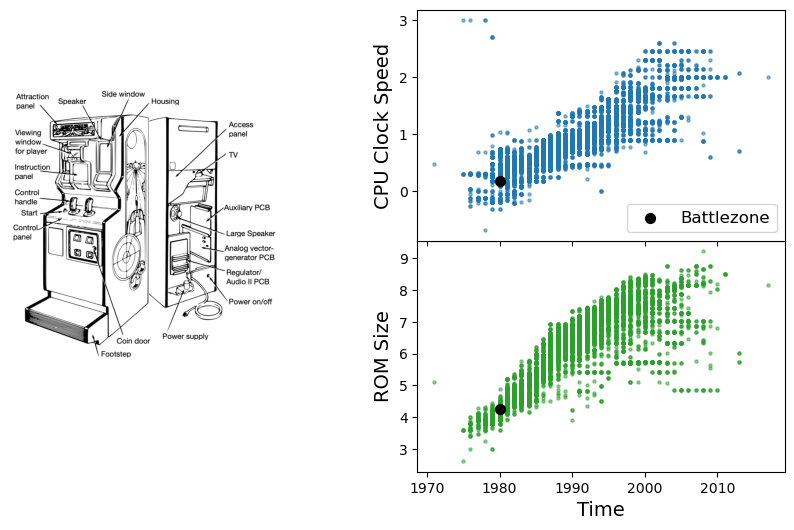

In [6]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import SVG
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnchoredOffsetbox, AuxTransformBox
from matplotlib.transforms import Bbox
from io import BytesIO
import cairosvg


# Convert SVG to PNG for plotting in matplotlib (optional if SVG not directly supported)
def load_svg_as_image(svg_path):
    png_data = BytesIO()
    cairosvg.svg2png(url=svg_path, write_to=png_data)
    png_data.seek(0)
    img = mpimg.imread(png_data, format='png')
    return img

# ---- Create Asymmetric Figure Layout ---- #
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 2, width_ratios=[1, 1.2], height_ratios=[1, 1], hspace=0, wspace=0.3)

# Left panel for the SVG image (spans both rows)
ax_left = fig.add_subplot(gs[:, 0])
ax_left.axis("off")  # Hide axes for image

# Load and display the SVG image
svg_image_path = "./battlezone.svg"  # Replace with actual path
svg_img = load_svg_as_image(svg_image_path)
ax_left.imshow(svg_img)

# Right bottom: ROM Size
ax_rom = fig.add_subplot(gs[1, 1])
ax_rom.scatter(df_prod['year'], df_prod['log_rom_size'], s=5, color='tab:green', alpha=0.5)
ax_rom.set_xlabel("Time", fontsize=14)
ax_rom.set_ylabel("ROM Size", fontsize=14)
ax_rom.grid(False)

# Right top: CPU Clock Speed
ax_cpu = fig.add_subplot(gs[0, 1], sharex=ax_rom)
ax_cpu.scatter(df_prod['year'], df_prod['log_clock_speed'], s=5, color='tab:blue', alpha=0.5)
ax_cpu.set_ylabel("CPU Clock Speed", fontsize=14)
ax_cpu.grid(False)
ax_cpu.tick_params(labelbottom=False)  # hide x-tick labels on top
ax_cpu.set_xlabel("")  # just to be safe



# Highlight Battlezone if defined
if "battlezone" in globals():
    ax_cpu.scatter(battlezone['year'], battlezone['log_clock_speed'], color='black', s=50, edgecolor='black', label="Battlezone")
    ax_rom.scatter(battlezone['year'], battlezone['log_rom_size'], color='black', s=50, edgecolor='black', label="Battlezone")
    ax_cpu.legend(fontsize=12)

# Final adjustments

# Adjust layout tightly to remove any extra padding
plt.subplots_adjust(hspace=0, wspace=0.3)
# plt.savefig("asymmetric_figure_tight.svg", bbox_inches='tight', dpi=300)
plt.show()


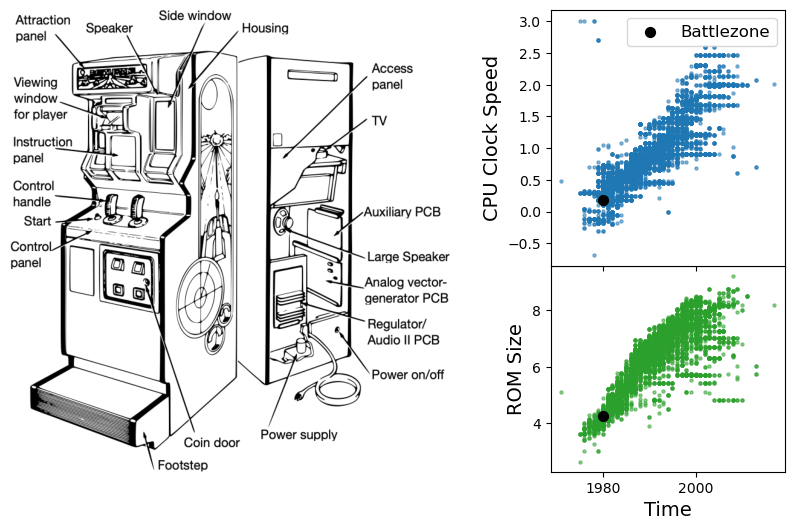

In [7]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
from io import BytesIO
import cairosvg
import numpy as np

# Convert SVG to PNG and auto-crop white borders
def load_and_crop_svg(svg_path):
    # Convert SVG to PNG
    png_data = BytesIO()
    cairosvg.svg2png(url=svg_path, write_to=png_data)
    png_data.seek(0)
    img = mpimg.imread(png_data, format='png')

    # Convert to grayscale to detect content
    if img.shape[2] == 4:  # has alpha
        alpha = img[:, :, 3]
        mask = alpha > 0
    else:  # no alpha, assume white background
        gray = np.mean(img[:, :, :3], axis=2)
        mask = gray < 0.99  # threshold for non-white

    coords = np.argwhere(mask)
    y0, x0 = coords.min(axis=0)
    y1, x1 = coords.max(axis=0) + 1  # slices are exclusive at the end

    cropped_img = img[y0:y1, x0:x1]
    return cropped_img

# ---- Create Asymmetric Figure Layout ---- #
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 2, width_ratios=[1.5, 0.8], height_ratios=[1, 0.8], hspace=0, wspace=0.3)

# Left panel for the SVG image (spans both rows)
ax_left = fig.add_subplot(gs[:, 0])
ax_left.axis("off")  # Hide axes for image

# Load and display the cropped SVG image
svg_image_path = "./battlezone.svg"
svg_img = load_and_crop_svg(svg_image_path)
ax_left.imshow(svg_img)
ax_left.set_aspect('auto')

# Right bottom: ROM Size
ax_rom = fig.add_subplot(gs[1, 1])
ax_rom.scatter(df_prod['year'], df_prod['log_rom_size'], s=5, color='tab:green', alpha=0.5)
ax_rom.set_xlabel("Time", fontsize=14)
ax_rom.set_ylabel("ROM Size", fontsize=14)
ax_rom.grid(False)

# Right top: CPU Clock Speed
ax_cpu = fig.add_subplot(gs[0, 1], sharex=ax_rom)
ax_cpu.scatter(df_prod['year'], df_prod['log_clock_speed'], s=5, color='tab:blue', alpha=0.5)
ax_cpu.set_ylabel("CPU Clock Speed", fontsize=14)
ax_cpu.grid(False)
ax_cpu.tick_params(labelbottom=False)
ax_cpu.set_xlabel("")

# Highlight Battlezone if defined
if "battlezone" in globals():
    ax_cpu.scatter(battlezone['year'], battlezone['log_clock_speed'], color='black', s=50, edgecolor='black', label="Battlezone")
    ax_rom.scatter(battlezone['year'], battlezone['log_rom_size'], color='black', s=50, edgecolor='black', label="Battlezone")
    ax_cpu.legend(fontsize=12)

# Final layout adjustment
plt.subplots_adjust(hspace=0, wspace=0.3)
plt.show()


In [8]:
# Skip the left-side image panel
fig = plt.figure(figsize=(6, 6))  # Smaller since it's only right side
gs = GridSpec(2, 1, hspace=0)

ax_rom = fig.add_subplot(gs[1])
ax_rom.scatter(df_prod['year'], df_prod['log_rom_size'], s=5, color='tab:green', alpha=0.5)
ax_rom.set_xlabel("Time", fontsize=14)
ax_rom.set_ylabel("ROM Size", fontsize=14)
ax_rom.grid(False)

ax_cpu = fig.add_subplot(gs[0], sharex=ax_rom)
ax_cpu.scatter(df_prod['year'], df_prod['log_clock_speed'], s=5, color='tab:blue', alpha=0.5)
ax_cpu.set_ylabel("CPU Clock Speed", fontsize=14)
ax_cpu.grid(False)
ax_cpu.tick_params(labelbottom=False)

# Highlight battlezone
if "battlezone" in globals():
    ax_cpu.scatter(battlezone['year'], battlezone['log_clock_speed'], color='black', s=50, edgecolor='black', label="Battlezone")
    ax_rom.scatter(battlezone['year'], battlezone['log_rom_size'], color='black', s=50, edgecolor='black')
    ax_cpu.legend(fontsize=12)

# plt.tight_layout()

plt.savefig("right_panels.svg")  # Save right side only
plt.close()


In [10]:
from svgutils.transform import fromfile, SVGFigure, GroupElement

# Load both SVGs
left_fig = fromfile("battlezone.svg")
right_fig = fromfile("right_panels.svg")

# Extract root elements (the graphics part)
left_root = left_fig.getroot()
right_root = right_fig.getroot()

# Optional: scale down the SVGs if needed
left_root.scale(0.9)         # Adjust as needed
right_root.scale(0.9)

# Move the graphics into position
left_root.moveto(0, 0)
right_root.moveto(350, 0)    # Adjust X offset depending on spacing

# Combine both into one SVG figure
final_fig = SVGFigure("10in", "6in")  # Final canvas size
final_fig.append([left_root, right_root])

# Save the final SVG
final_fig.save("final_figure.svg")
